In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from funciones_EDA import *

In [38]:
df_malaga = pd.read_csv("../data/dataset_viajeros_procesado.csv", encoding= "latin1", sep= ";")
df_malaga.drop(columns="Unnamed: 0", inplace=True)

In [39]:
# En primer lugar, vamos a dividir el dataset por temporadas:

verano = df_malaga.TEMPORADA == "Temporada Alta"

df_verano= df_malaga[verano]

df_verano

,MES,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA,TEMPORADA
15,6,Reino Unido,220636.0,1540936.0,6.25,Temporada Alta
16,6,Alemania,46888.0,356349.0,7.60,Temporada Alta
17,6,Irlanda,60493.0,489993.0,8.10,Temporada Alta
18,6,Países Bajos,48578.0,349762.0,7.20,Temporada Alta
19,7,Suecia,42893.0,368880.0,8.60,Temporada Alta
20,7,Países Bajos,47161.0,306547.0,6.50,Temporada Alta
21,7,Francia,50978.0,372139.0,7.30,Temporada Alta
22,7,Irlanda,61319.0,539607.0,8.80,Temporada Alta
23,7,Reino Unido,226690.0,1694595.0,6.55,Temporada Alta
24,7,Alemania,40797.0,330456.0,8.10,Temporada Alta


In [40]:
pre = df_malaga.TEMPORADA == "Pre-Temporada"
df_pre= df_malaga[pre]

post = df_malaga.TEMPORADA == "Post-Temporada"
df_post = df_malaga[post]

In [41]:
# Recuperamos el bivariante entre "PAIS_ORIGEN" y "TURISTAS":

malaga = df_malaga.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)

top_malaga  # utilizaremos este dataframe groupby para el diagrama de barras

,PAIS_ORIGEN,TURISTAS
0,Alemania,341545.0
1,Bélgica,102341.0
2,Dinamarca,48658.0
3,Francia,306942.0
4,Irlanda,394772.0
5,Países Bajos,369142.0
6,Reino Unido,1472554.0
7,Suecia,172368.0


In [42]:
# Repetimos la misma operación con los tres datasets que hemos obtenido tras la división por temporadas:

verano = df_verano.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()

top_verano = pd.DataFrame(verano)
top_verano.reset_index(drop=False, inplace=True)

top_verano  

,PAIS_ORIGEN,TURISTAS
0,Alemania,139105.0
1,Francia,140570.0
2,Irlanda,178446.0
3,Países Bajos,170480.0
4,Reino Unido,676201.0
5,Suecia,42893.0


In [43]:
pre = df_pre.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()

top_pre = pd.DataFrame(pre)
top_pre.reset_index(drop=False, inplace=True)

top_pre

,PAIS_ORIGEN,TURISTAS
0,Alemania,89566.0
1,Bélgica,49300.0
2,Dinamarca,21590.0
3,Francia,83245.0
4,Irlanda,107222.0
5,Países Bajos,93170.0
6,Reino Unido,380282.0
7,Suecia,63036.0


In [44]:
post = df_post.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()

top_post = pd.DataFrame(post)
top_post.reset_index(drop=False, inplace=True)

top_post

,PAIS_ORIGEN,TURISTAS
0,Alemania,112874.0
1,Bélgica,53041.0
2,Dinamarca,27068.0
3,Francia,83127.0
4,Irlanda,109104.0
5,Países Bajos,105492.0
6,Reino Unido,416071.0
7,Suecia,66439.0


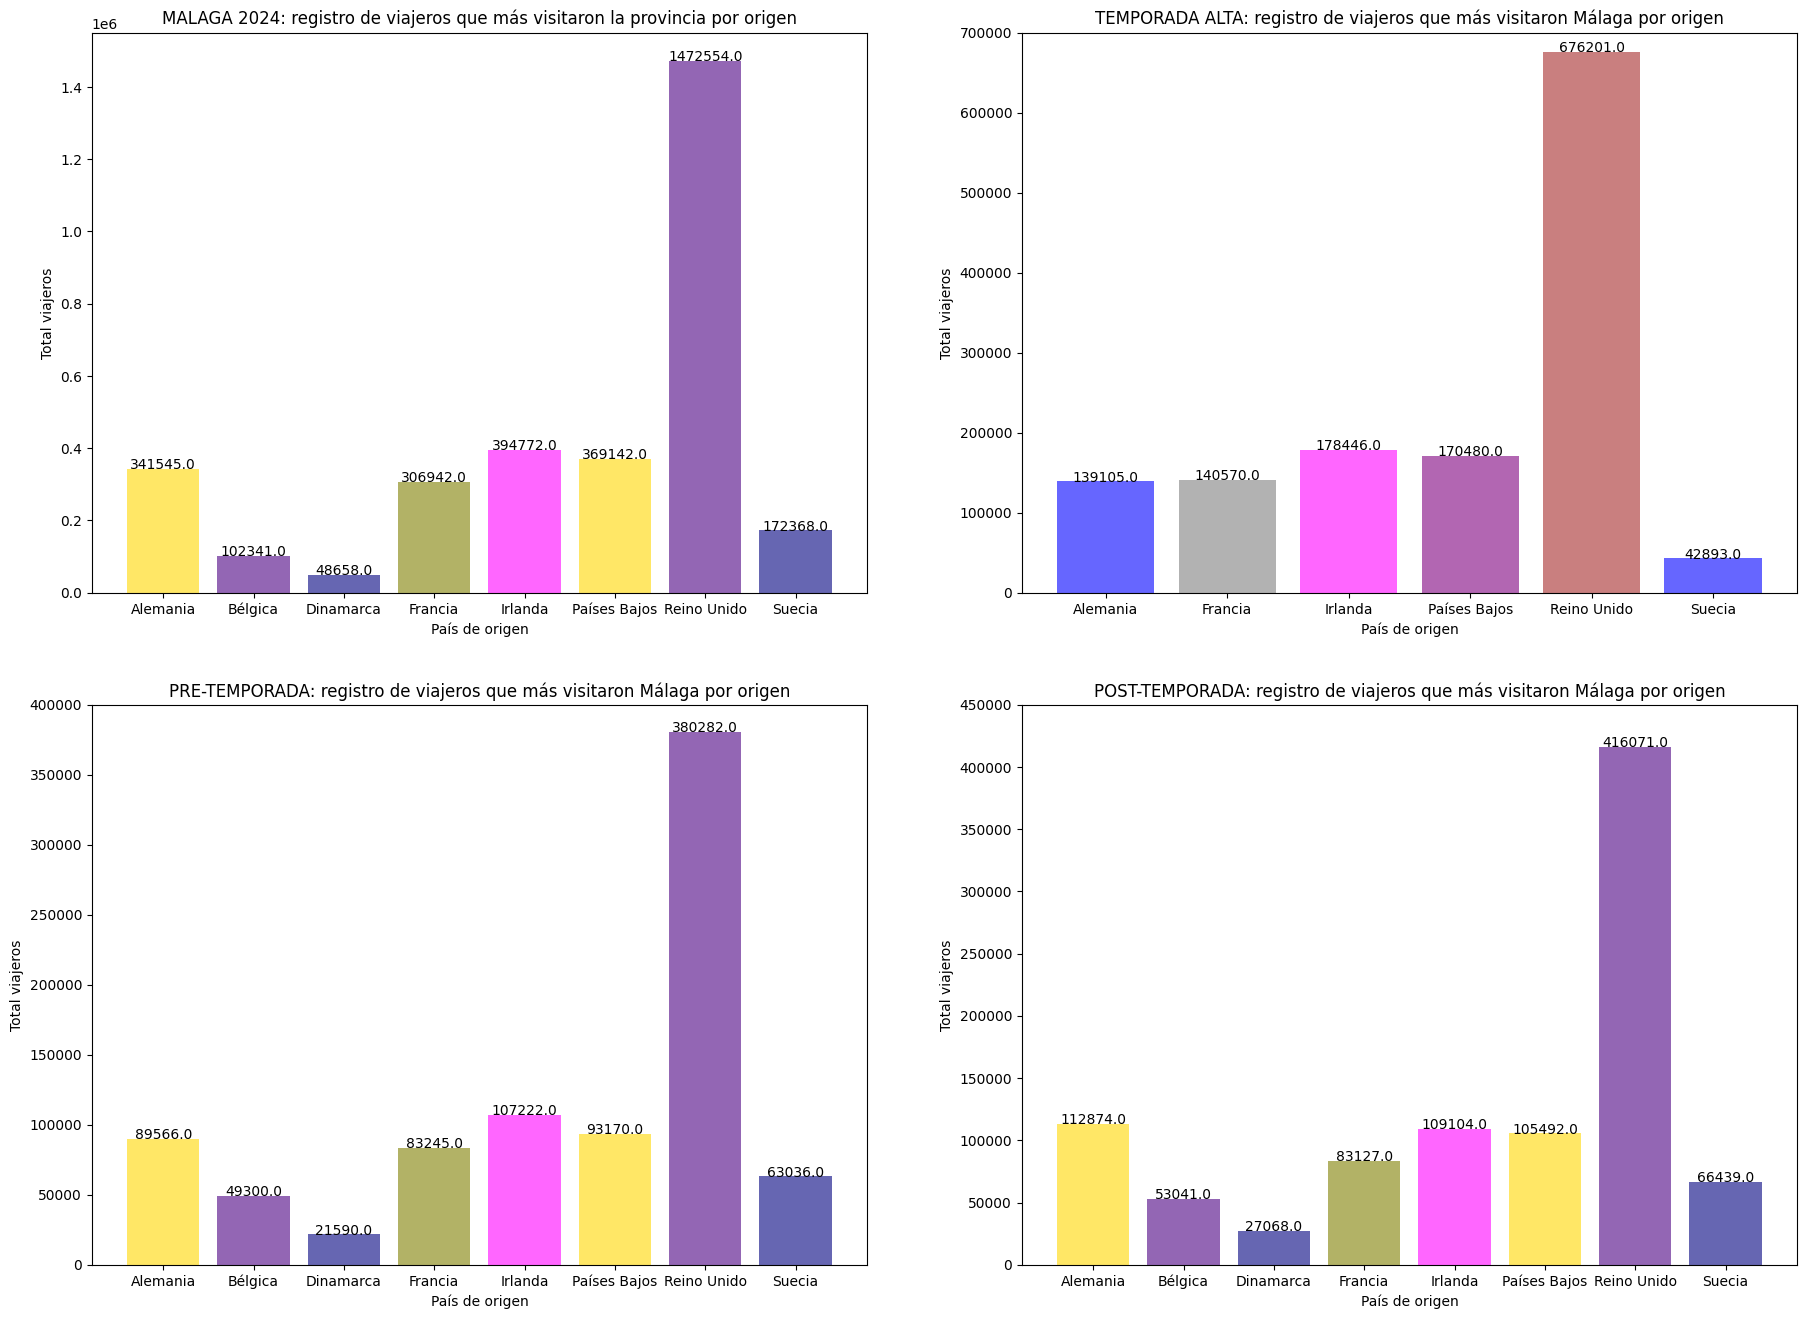

In [45]:
# ANÁLISIS MULTIVARIANTE: DIAGRAMA DE BARRAS ENTRE 'PAIS_ORIGEN' Y 'TURISTAS' EN FUNCIÓN DE 'TEMPORADA'

fig, ax = plt.subplots(2,2, figsize=(22,16)) 
ax = ax.flatten()


    # DIAGRAMA DE BARRAS 2024 POR ORIGEN Y TURISTAS:

categorias = top_malaga.PAIS_ORIGEN.value_counts().index.to_list()        # Pasamos a una lista la posición de aparición de frecuencias asociadas a los países de origen
frecuencia = top_malaga["TURISTAS"].to_list()                             # Lista de valores absolutos de turistas

ax[0].bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax[0].set_ylim(0,1550000)
ax[0].set_title("MALAGA 2024: registro de viajeros que más visitaron la provincia por origen")
ax[0].set_xlabel("País de origen")
ax[0].set_ylabel("Total viajeros")  

for i in range (8):
    ax[0].text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")


    # TEMPORADA ALTA

categorias = top_verano.PAIS_ORIGEN.value_counts().index.to_list()        
frecuencia = top_verano["TURISTAS"].to_list()  

ax[1].bar(categorias, frecuencia ,color = ["blue","gray","magenta","purple","brown"], alpha= 0.6)
ax[1].set_ylim(0,700000)
ax[1].set_title("TEMPORADA ALTA: registro de viajeros que más visitaron Málaga por origen")
ax[1].set_xlabel("País de origen")
ax[1].set_ylabel("Total viajeros")  

for i in range (6):
    ax[1].text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")


    # PRE- TEMPORADA

categorias = top_pre.PAIS_ORIGEN.value_counts().index.to_list()       
frecuencia = top_pre["TURISTAS"].to_list()               
   
ax[2].bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax[2].set_ylim(0,400000)
ax[2].set_title("PRE-TEMPORADA: registro de viajeros que más visitaron Málaga por origen")
ax[2].set_xlabel("País de origen")
ax[2].set_ylabel("Total viajeros")  

for i in range (8):
    ax[2].text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")


    # POST-TEMPORADA

categorias = top_post.PAIS_ORIGEN.value_counts().index.to_list()        
frecuencia = top_post["TURISTAS"].to_list()                

ax[3].bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
ax[3].set_ylim(0,450000)
ax[3].set_title("POST-TEMPORADA: registro de viajeros que más visitaron Málaga por origen")
ax[3].set_xlabel("País de origen")
ax[3].set_ylabel("Total viajeros")  

for i in range (8):
    ax[3].text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "medium")


In [46]:
fig.savefig("../img/multivariante_pais_turistas_temporada")

- Reino Unido encabeza indiscutiblemente el ranking de total de turistas que visitaron Málaga, tanto en la temporada completa 2024, como en las subdivisiones establecidas.
- Irlanda, Francia, Alemania y Países Bajos le siguen de lejos, pero con registros bastante elevados. Ocuparían el segundo lugar en el ránking.
- Es curioso observar que países como Suecia, Dinamarca y Bélgica prefieren visitar Málaga fuera de temporada. Será una cuestión climática? Las temperaturas en verano pueden ser
demasiado extremas.

In [47]:
# Vemos que el país de origen afecta claramente en el número de turistas que nos visitan o, al menos, eso podemos pensar a priori. 
# He querido aplicar el test de ANNOVA para corroborar nuestra hipótesis: ambas variables están relacionadas ( dejo la sintaxis a continuación).
# Sin embargo, la muestra que le doy es tan pequeña que no es válida para establecer una correlación.

# Como la distribución es muy semejante en las divisiones por temporada (exceptuando la temporada alta pese a que se mantiene la similitud), aplicamos el test al dataset entero:

from scipy import stats

turistas_por_pais = df_malaga.groupby(["PAIS_ORIGEN"])["TURISTAS"].sum()
turistas_por_pais


f_val, p_val = stats.f_oneway(*turistas_por_pais) 
                                                    
print("Valor F:", f_val)
print("Valor p:", p_val)

# small sample warning!!! no cuento con suficientes registros como para demostrar la relación entre variables.
# De todos modos, los datos que estamos estudiando no son una muestra sino toda la población (es decir TODOS los registros de turistas en la provincia de Málaga en 2024). 
# De la totalidad de registros, hemos limpiado y acotado, aún así siguen representando la TOTALIDAD, por lo tanto son lo que son. No tengo que demostrar necesariamente que hay 
# correlación entre ellos.


Valor F: nan
Valor p: nan


c:\Users\tania\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\tania\AppData\Local\Temp\ipykernel_17920\1262857828.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = stats.f_oneway(*turistas_por_pais)


In [48]:
# DIAGRAMA DE BARRAS ANÁLISIS MULTIVARIANTE ENTRE 'PAIS_ORIGEN' Y 'ESTANCIA_MEDIA' EN FUNCIÓN DE 'TEMPORADA'

# repetimos el groupby por países, pero esta vez con los valores de estancia media. Al no tratarse de valores absolutos, sino de una media (como su propio nombre indica), 
# aplicaremos la media al groupby en lugar de la suma:

verano = df_verano.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean()

top_verano = pd.DataFrame(verano)
top_verano.reset_index(drop=False, inplace=True)

top_verano  

,PAIS_ORIGEN,ESTANCIA_MEDIA
0,Alemania,8.200000
1,Francia,7.600000
2,Irlanda,8.566667
3,Países Bajos,7.066667
4,Reino Unido,6.733333
5,Suecia,8.600000


In [49]:
malaga = df_malaga.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean()

top_malaga = pd.DataFrame(malaga)
top_malaga.reset_index(drop=False, inplace=True)


pre = df_pre.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean()

top_pre = pd.DataFrame(pre)
top_pre.reset_index(drop=False, inplace=True)


post = df_post.groupby(["PAIS_ORIGEN"])["ESTANCIA_MEDIA"].mean()

top_post = pd.DataFrame(pre)
top_post.reset_index(drop=False, inplace=True)

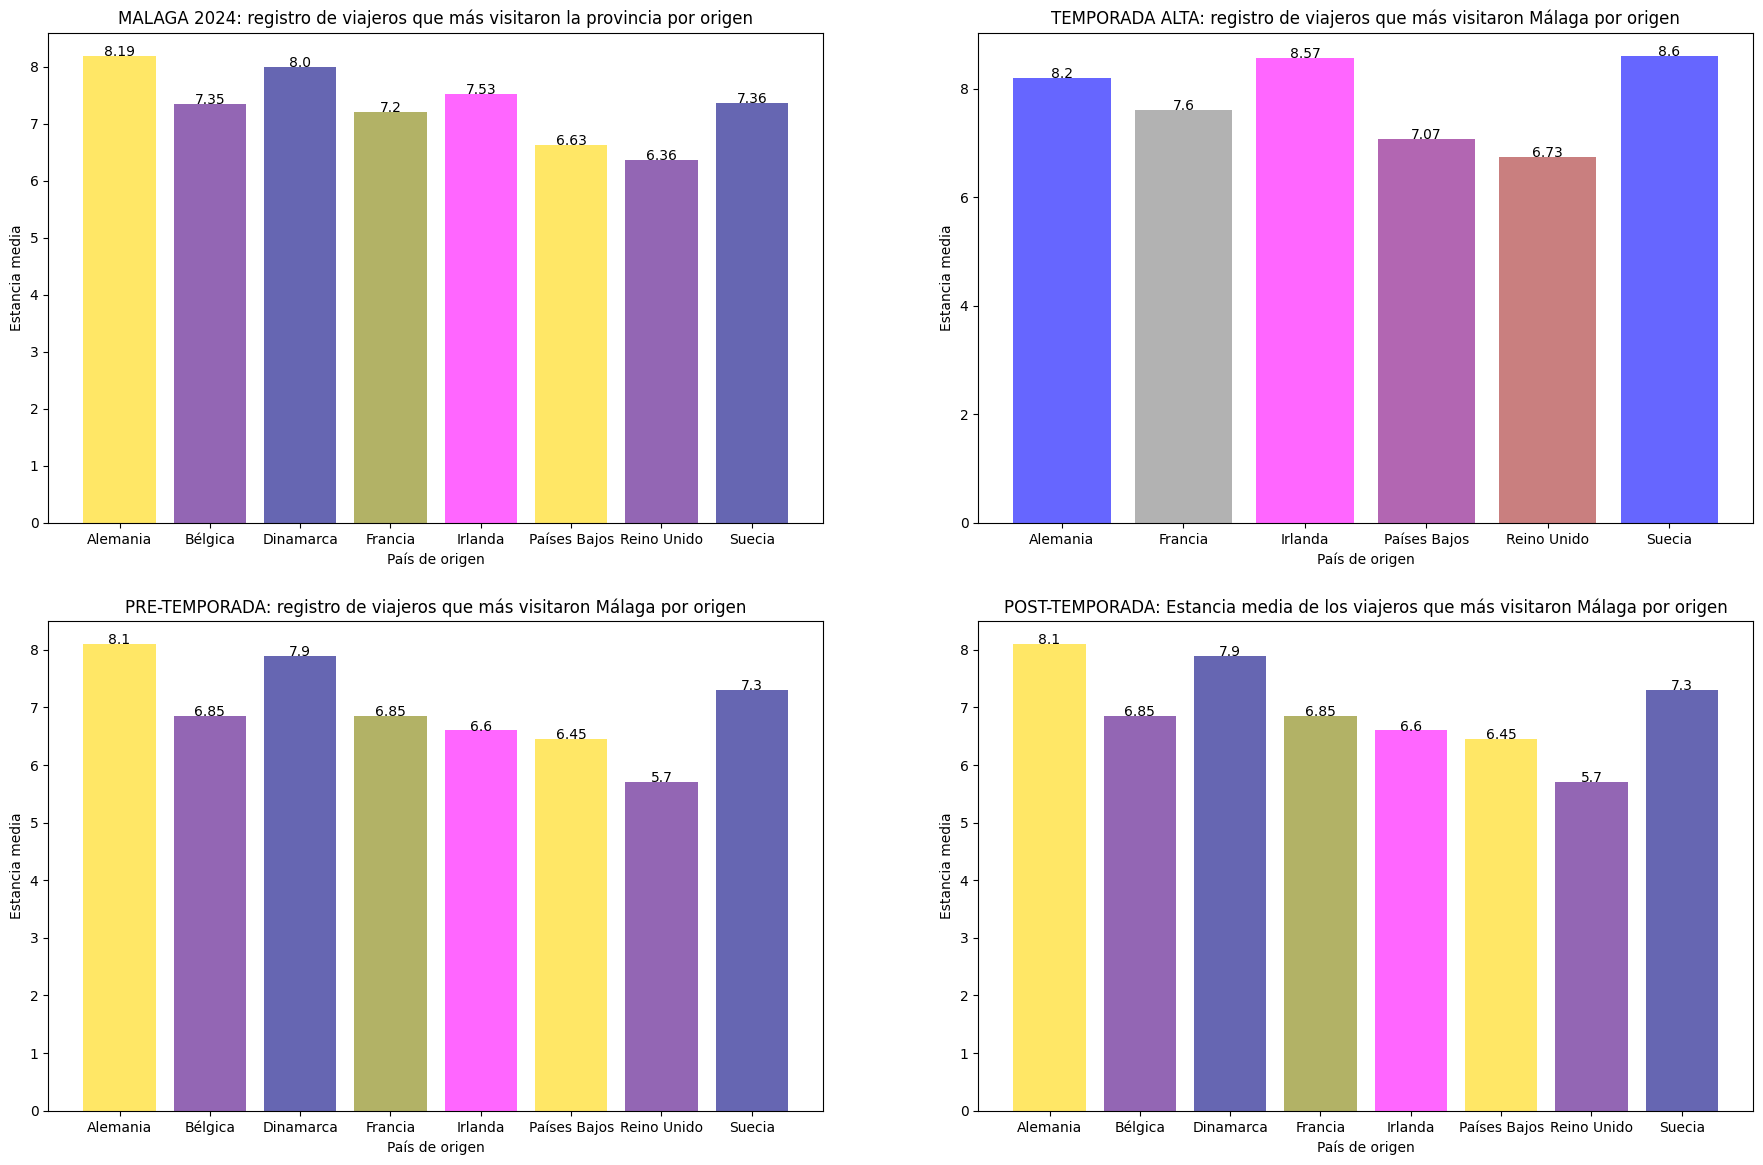

In [50]:
# Y ahora sí, podemos sacar nuestra gráfica:

fig, ax = plt.subplots(2,2, figsize=(22,14)) 
ax = ax.flatten()

categorias = top_malaga.PAIS_ORIGEN.value_counts().index.to_list()        # Pasamos a una lista la posición de aparición de frecuencias asociadas a las ciudades
frecuencia = top_malaga["ESTANCIA_MEDIA"].to_list()                             # Lista de valores absolutos de población

# DIAGRAMA DE BARRAS 20024 POR ORIGEN Y TURISTAS:

ax[0].bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
#ax[0].set_ylim(0,1550000)
ax[0].set_title("MALAGA 2024: registro de viajeros que más visitaron la provincia por origen")
ax[0].set_xlabel("País de origen")
ax[0].set_ylabel("Estancia media")  

for i in range (8):
    ax[0].text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")

# TEMPORADA ALTA

categorias = top_verano.PAIS_ORIGEN.value_counts().index.to_list()        # Pasamos a una lista la posición de aparición de frecuencias asociadas a las ciudades
frecuencia = top_verano["ESTANCIA_MEDIA"].to_list()  

ax[1].bar(categorias, frecuencia ,color = ["blue","gray","magenta","purple","brown"], alpha= 0.6)
#ax[1].set_ylim(0,700000)
ax[1].set_title("TEMPORADA ALTA: registro de viajeros que más visitaron Málaga por origen")
ax[1].set_xlabel("País de origen")
ax[1].set_ylabel("Estancia media")  

for i in range (6):
    ax[1].text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")


# PRE- TEMPORADA

categorias = top_pre.PAIS_ORIGEN.value_counts().index.to_list()       
frecuencia = top_pre["ESTANCIA_MEDIA"].to_list()               
   
ax[2].bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
#ax[2].set_ylim(0,400000)
ax[2].set_title("PRE-TEMPORADA: registro de viajeros que más visitaron Málaga por origen")
ax[2].set_xlabel("País de origen")
ax[2].set_ylabel("Estancia media")  

for i in range (8):
    ax[2].text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")


categorias = top_post.PAIS_ORIGEN.value_counts().index.to_list()        
frecuencia = top_post["ESTANCIA_MEDIA"].to_list()                

ax[3].bar(categorias, frecuencia ,color = ["gold","indigo","navy","olive", "magenta"], alpha= 0.6)
#ax[3].set_ylim(0,450000)
ax[3].set_title("POST-TEMPORADA: Estancia media de los viajeros que más visitaron Málaga por origen")
ax[3].set_xlabel("País de origen")
ax[3].set_ylabel("Estancia media")  

for i in range (8):
    ax[3].text(categorias[i],frecuencia[i],f"{round(frecuencia[i],2)}", ha = "center", fontsize= "medium")


In [51]:
fig.savefig("../img/multivariante_estancia_pais_temporada")

- Es interesante ver que Reino Unido encabeza esta vez por debajo el ranking de media por estancia. Este dato hay que cogerlo con pinzas pues es una tendencia central y, al haber tanta dispersión en cuanto al número de viajeros, no podemos tomarlo como una verdad absoluta.
- Países como Suecia y Dinamarca, que en ocupaban los últimos puestos en la gráfica pais_origen vs turistas, destacan en este análisis como dos de los países junto a Alemania que más días de media se hospedan.
- De cara a la efectividad del negocio nos interesa captar clientes que prolonguen sus estancias, ya que general mayor beneficio en todos los sentidos: se dejan más dinero en el rate por noche, gastan más en los outlets del hotel y, por último, housekeeping  pierde menos recursos que con las estancias más cortas.
- De nuevo, la muestra de datos es demasiado pequeña para aplicar un test de ANNOVA favorable.

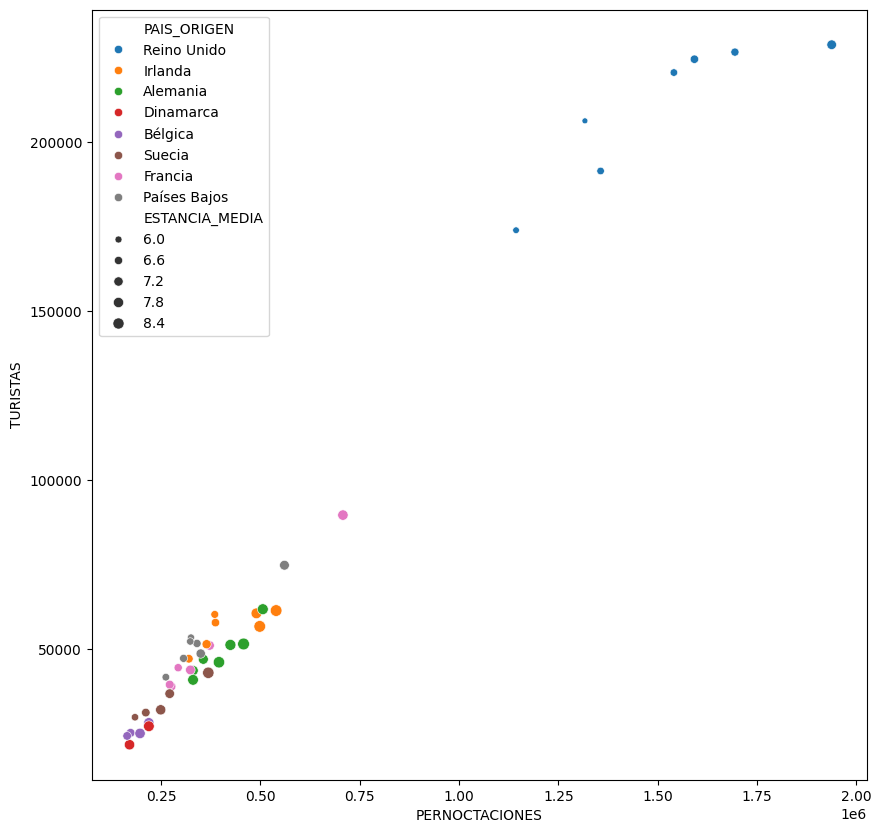

In [52]:
# Termninemos con los análisis a 4 dimensiones:

# MULTIVARIANTE TURISTAS, PERNOCTACIONES, ESTANCIA_MEDIA y PAIS_ORIGEN

fig, ax = plt.subplots(figsize= (10,10))
sns.scatterplot(x="PERNOCTACIONES", y= "TURISTAS", size = df_malaga["ESTANCIA_MEDIA"], data = df_malaga, hue= "PAIS_ORIGEN");

In [53]:
fig.savefig("../img/multivariante_4_variables")

- La estancia media se mantiene entre los 7-8 días en la parte donde se concentra el registro de datos (turistas / pernoctaciones)
- En cuanto a los outliers que rozan los 2000 turistas, vemos de nuevo que se trata del Reino Unido (recordemos que se desmarcaban exageradamente del resto de países). Es curioso ver que ahí es donde la estancia media disminuye.

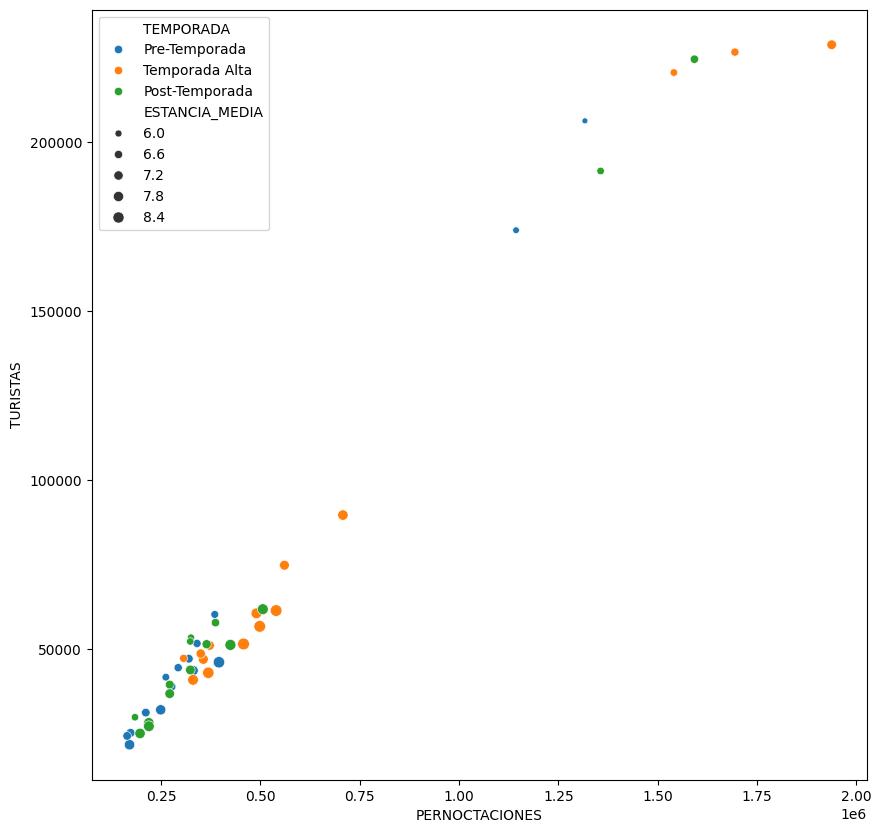

In [54]:
fig, ax = plt.subplots(figsize= (10,10))
sns.scatterplot(x="PERNOCTACIONES", y= "TURISTAS", size = df_malaga["ESTANCIA_MEDIA"], data = df_malaga, hue = "TEMPORADA");

- La gráfica corrobora lo que hemos ido viendo hasta ahora: 
- El menor num de turistas y pernoctaciones se concentran en las pre y post temporadas.
- En temporada alta destacan el mayor num de turistas, pernoctaciones y también estancia media.
- En cuanto a los outliers que rozan los 200000, el pico se sitúa obviamente en la temporada alta.